In [ ]:
https://archive.ics.uci.edu/ml/datasets/bank+marketing

Accuracy: 0.9002506635210852
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.95     11977
        True       0.66      0.30      0.41      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564

Confusion Matrix:
 [[11733   244]
 [ 1109   478]]
|--- duration <= 518.50
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= 225.50
|   |   |   |--- month_mar <= 0.50
|   |   |   |   |--- month_oct <= 0.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- month_oct >  0.50
|   |   |   |   |   |--- class: False
|   |   |   |--- month_mar >  0.50
|   |   |   |   |--- duration <= 105.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- duration >  105.50
|   |   |   |   |   |--- class: False
|   |   |--- duration >  225.50
|   |   |   |--- housing_yes <= 0.50
|   |   |   |   |--- age <= 60.

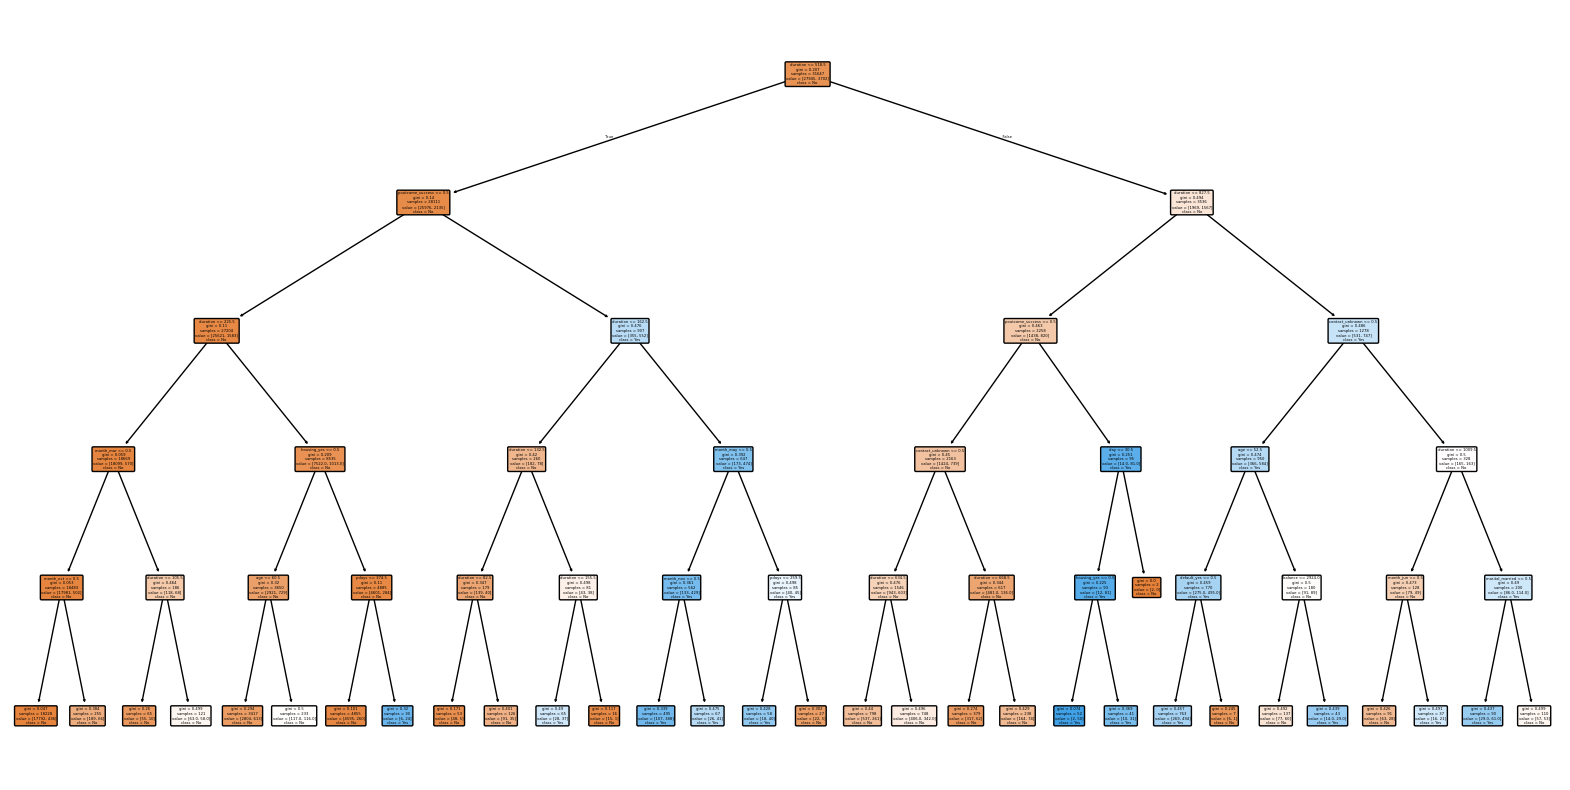

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv('bank-full.csv', sep=';')

# 2. Preprocess
# Convert categorical columns to numeric via one-hot encoding
df = pd.get_dummies(df, drop_first=True)

X = df.drop('y_yes', axis=1)  # assuming 'y' is encoded as 'y_yes' after one-hot
y = df['y_yes']

# 3. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Train
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 5. Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6. Display tree textually
r = export_text(clf, feature_names=list(X.columns))
print(r)

# 7. Visualize (optional)
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()


